In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the data
DATA_FILENAME = "hbonddata.xlsx"
dataframe_raw = pd.read_excel(DATA_FILENAME,sheet_name='data')
dataframe_raw = dataframe_raw.filter(items=['Acid', 'Base', 'Acid atom', 'Base atom', 'Δν', '-ΔH (kJ mol-1)'])
# Drop the rows with NANs. 
dataframe_raw = dataframe_raw.dropna(axis=0, how = 'any')
dataframe_raw.head()

,Acid,Base,Acid atom,Base atom,Δν,-ΔH (kJ mol-1)
0,(CCl3)2CHOH,Acetonitrile,8,7.0,211.0,22.6
1,(CH2Cl)2CHOH,Acetonitrile,8,7.0,102.0,14.2
2,(CHCl2)2CHOH,Acetonitrile,8,7.0,174.0,19.8
3,Acetic acid,Pyridine,8,7.0,1000.0,40.0
4,Acetic acid,Dimethyl sulfoxide,8,8.0,840.0,33.5


In [3]:
# Rename the columns
dataframe_raw.rename(columns=
                                    {'Acid atom': 'Acidatom', 'Base atom': 'Baseatom'}, inplace =True)
dataframe_raw.head()

,Acid,Base,Acidatom,Baseatom,Δν,-ΔH (kJ mol-1)
0,(CCl3)2CHOH,Acetonitrile,8,7.0,211.0,22.6
1,(CH2Cl)2CHOH,Acetonitrile,8,7.0,102.0,14.2
2,(CHCl2)2CHOH,Acetonitrile,8,7.0,174.0,19.8
3,Acetic acid,Pyridine,8,7.0,1000.0,40.0
4,Acetic acid,Dimethyl sulfoxide,8,8.0,840.0,33.5


In [4]:
# Check the info of the data
dataframe_raw.describe()

,Acidatom,Baseatom,Δν,-ΔH (kJ mol-1)
count,312.000000,312.000000,312.000000,312.000000
mean,7.891026,7.576923,322.867894,19.733235
std,1.575837,0.526329,351.661405,11.785890
min,6.000000,6.000000,1.000000,0.700000
25%,8.000000,7.000000,111.872658,11.002940
50%,8.000000,8.000000,227.500000,17.799160
75%,8.000000,8.000000,377.000000,25.275000
max,17.000000,8.000000,2300.000000,67.000000


In [5]:
dataframe_raw.columns

Index(['Acid', 'Base', 'Acidatom', 'Baseatom', 'Δν', '-ΔH (kJ mol-1)'], dtype='object')

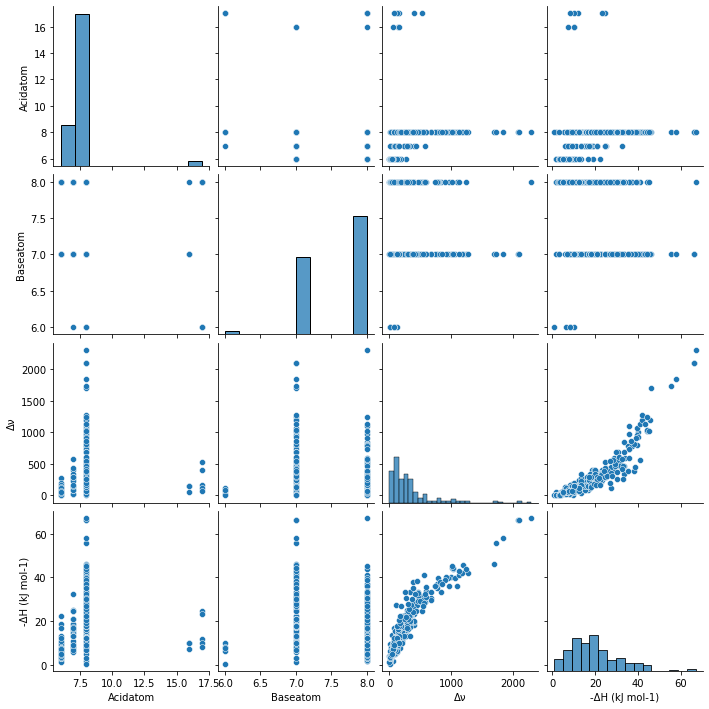

In [6]:
sns.pairplot(dataframe_raw)

/home/kudoshiji/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='-ΔH (kJ mol-1)', ylabel='Density'>

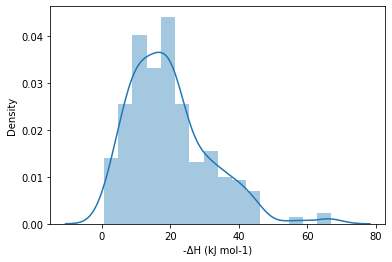

In [7]:
sns.distplot(dataframe_raw['-ΔH (kJ mol-1)'])

<AxesSubplot:>

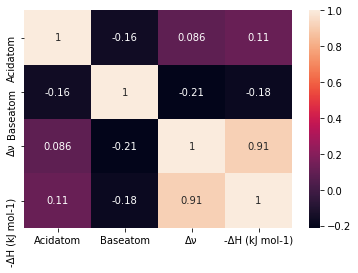

In [8]:
sns.heatmap(dataframe_raw.corr(), annot=True)

In [9]:
X = dataframe_raw[['Acidatom', 'Baseatom', 'Δν']]

y = dataframe_raw['-ΔH (kJ mol-1)']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [11]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train, y_train) 

LinearRegression()

In [13]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

LinearRegression()

In [14]:
print(lm.intercept_)

9.28431464422671


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Acidatom,0.183229
Baseatom,-0.112037
Δν,0.030250


In [18]:
predictions = lm.predict(X_test) 

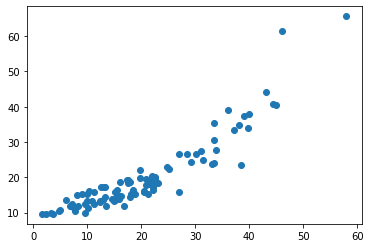

In [19]:
plt.scatter(y_test,predictions)

/home/kudoshiji/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='-ΔH (kJ mol-1)', ylabel='Density'>

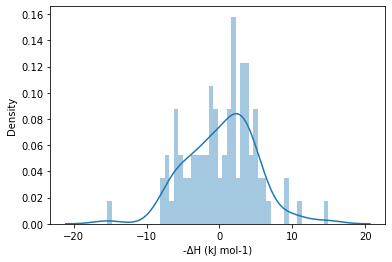

In [20]:
sns.distplot((y_test-predictions),bins=50)

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 3.7818176498085014
MSE: 22.292127956064757
RMSE: 4.721454008678339
